<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regressão Logística**

### **O que é uma regressão logística?**

A regressão logística é um modelo estatístico que, em essência, modela a relação entre uma ou mais variáveis independentes para prever um resultado de uma variável de saída/dependente categórica, isto é, que assume apenas dois valores, tais como: "sim" ou "não", "verdadeiro" ou "falso", "0" ou "1".

Em outras palavras, a regressão logística é usada para classificar registros de um conjunto de dados com base nos valores dos campos de entrada. Tem como finalidade para prever a probabilidade de uma variável dependente binária, podendo ser usada tanto para classificação binária, quanto para classificação de múltiplas classes.

### **Quando é interessante aplicar o Modelo de Regressão Logística?**

A seguir quatro modalidades em que a regressão logística é uma boa escolha:

* Quando o campo alvo dos dados for categórico, especificamente binário, como um/zero, sim/não, emigrou/não migrou, positivo/negativo, etc.
* Quando for interessante estimar probabilidades para previsões. Por exemplo, quando é interessante saber qual a probabilidade de um cliente comprar um produto, a regressão logística retornará uma pontuação de probabilidade entre zero, conforme a amostra de dados.
* Quando os dados forem linearmente separáveis, assim um classificador classificará todos os pontos de um lado da fronteira de decisão como pertencentes a uma classe e os do outro lado como pertencentes à outra classe. A fronteira de decisão da regressão logística pode ser uma linha, plano ou hiperplano.
* Quando se pretende compreender o impacto de determinada característica. É possível selecionar as melhores características com base na significância estatística dos coeficientes ou parâmetros do modelo de regressão logística. Isso permite compreender o impacto de uma variável independente na variável dependente, controlando as outras variáveis independentes.

## **Instalando e importando as bibliotecas Python**

---



In [44]:
!pip install scikit-learn # Instala o Scikit-learn para o aprendizado de máquina
!pip install matplotlib # Instala o Matplotlib para plotagem gráfica em vários formatos
!pip install pandas # Instala o Pandas para análise e limpeza de dados, estruturas de dados e operações
!pip install numpy # Instala o NumPy para suporte a arrays e matrizes multidimensionais
!pip install seaborn # Instala o Seaborn para visualização de dados baseada no Matplotlib

In [53]:
import pandas as pd # Manipulação e análise de dados
import pylab as pl # Computação numérica e plotagem (Pylab, NumPy)
import numpy as np
import seaborn as sns # Visualização de dados baseada no Matplotlib
import matplotlib.pyplot as plt # Plotagem de gráficos
import scipy.optimize as opt # Otimização de funções
from sklearn import preprocessing # Pré-processamento de dados

# **Estudo de caso: previsão de cancelamento (*churn*) ou rotatividade de clientes de uma empresa de telecomunicações hipotética**

Neste estudo de caso, com base em dados hipotéticos (`ChurnData.csv`) de uma empresa de telecomunicações, iremos aplicar a regressão logística para analise de rotatividade dos clientes ou "previsão de churn", isto é, prever a probabilidade/risco de um cliente cancelar ou não seus serviços.

Ao analisar variáveis como tempo de contrato, uso de serviços e histórico de pagamentos, é possível identificar clientes com maior "risco de churn", assim a empresas poderá fortalecer a estratégia de marketing para fidelização (retenção) de determinadas categorias de clientes.

**Outros exemplos de aplicações:**

1. **Economia e Finanças**:
  * **Avaliação do risco de crédito de clientes**, ao analisar variáveis como histórico de crédito, renda e dívidas existentes, é possível determinar a probabilidade de um cliente não cumprir com suas obrigações financeiras, para se determinar se um empréstimo deve ou não ser concedido (risco de inadimplência).
  * **Detecção de fraudes em transações**, instituições financeiras tem utilizado modelagens capazes de analisar padrões de comportamento dos clientes, e a partir do monitoramento das transações, o modelo irá sinalizar atividades anômalas passíveis de investigação.
  * **Marketing**:
  * **Identificar clientes em potencial**, que têm maior probabilidade de responder a uma campanha publicitária.
2. **Industria**:
  * **Previsão de falhas em equipamentos industriais**, com base m dados de sensores e histórico de manutenção é possível prever falhas em máquinas, auxiliando as equipes de manutenção preditiva, reduzindo custos e evitando paradas não planejadas.
3. **Medicina**:
  * **Previsão de pacientes desenvolverem determinadas doenças**, com base em base de dados de resultados de exames e fatores de risco em pacientes, modelos como o de regressão logística podem analisar vários fatores, como faixa eatária, índice de massa corporal, pressão arterial, histórico familiar etc, e realizar as predições.

## **Importando e explorando os dados**

In [46]:
# importando e explorando os dados
churn_df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/ChurnData.csv")

# Imprime o número de linhas e colunas
print("Número de linhas e colunas:", churn_df.shape)

# Imprime os nomes das colunas/variáveis
print("Variáveis:", churn_df.columns.tolist())
churn_df.head()

Número de linhas e colunas: (200, 28)
Variáveis: ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager', 'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn']


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


O arquivo ChurnData.csv contém as seguintes variáveis:

* `tenure`: Tempo de permanência do cliente.
* `age`: Idade do cliente.
* `address`: Número de endereços associados ao cliente.
* `income`: Renda do cliente.
* `ed`: Nível educacional do cliente.
* `employ`: Tempo de emprego do cliente.
* `equip`: Indica se o cliente possui equipamento específico.
* `callcard`: Indica se o cliente possui cartão de chamadas.
* `wireless`: Indica se o cliente possui serviço sem fio.
* `longmon`: Gastos mensais com chamadas de longa distância.
* `tollmon`: Gastos mensais com tarifas adicionais.
* `equipmon`: Gastos mensais com equipamentos.
* `cardmon`: Gastos mensais com cartão de chamadas.
* `wiremon`: Gastos mensais com serviços sem fio.
* `longten`: Gastos totais com chamadas de longa distância.
* `tollten`: Gastos totais com tarifas adicionais.
* `cardten`: Gastos totais com cartão de chamadas.
* `voice`: Indica se o cliente possui serviço de correio de voz.
* `pager`: Indica se o cliente possui pager.
* `internet`: Indica se o cliente possui serviço de internet.
* `callwait`: Indica se o cliente possui serviço de chamada em espera.
* `confer`: Indica se o cliente possui serviço de conferência.
* `ebill`: Indica se o cliente utiliza faturamento eletrônico.
* `loglong`: Logaritmo dos gastos com chamadas de longa distância.
* `logtoll`: Logaritmo dos gastos com tarifas adicionais.
* `lninc`: Logaritmo da renda do cliente.
* `custcat`: Categoria do cliente.
* `churn`: total de clientes cancelados em determinado período de tempo (rotatividade de clientes).

In [51]:
# Selecionando as variáveis de interesse
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'income', 'custcat', 'churn']]
# Convertendo a coluna 'churn' para o tipo inteiro
churn_df.loc[:, 'churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,income,ed,employ,equip,callcard,wireless,income,income,custcat,churn
0,11.0,33.0,7.0,136.0,136.0,5.0,5.0,0.0,1.0,1.0,136.0,136.0,4.0,1.0
1,33.0,33.0,12.0,33.0,33.0,2.0,0.0,0.0,0.0,0.0,33.0,33.0,1.0,1.0
2,23.0,30.0,9.0,30.0,30.0,1.0,2.0,0.0,0.0,0.0,30.0,30.0,3.0,0.0
3,38.0,35.0,5.0,76.0,76.0,2.0,10.0,1.0,1.0,1.0,76.0,76.0,4.0,0.0
4,7.0,35.0,14.0,80.0,80.0,2.0,15.0,0.0,1.0,0.0,80.0,80.0,3.0,0.0


In [18]:
# Checa os nomes das colunas selecionadas
print("Colunas selecionadas:", churn_df.columns.tolist())

# Imprime o número de linhas e colunas selecionadas
print("Número de linhas e colunas selecionadas:", churn_df.shape)

Colunas selecionadas: ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']
Número de linhas e colunas selecionadas: (200, 10)


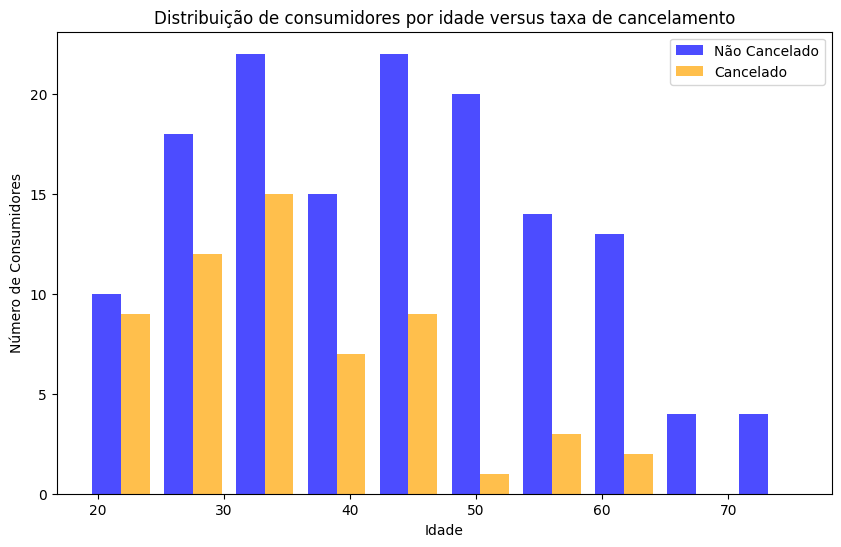

In [65]:
# @title Consumidores por idade vs Taxa de Cancelamento

plt.figure(figsize=(10, 6))
plt.hist([churn_df[churn_df['churn'] == 0]['age'], churn_df[churn_df['churn'] == 1]['age']],
         bins=10, label=['Não Cancelado', 'Cancelado'], color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Número de Consumidores')
plt.title('Distribuição de consumidores por idade versus taxa de cancelamento (rotatividade)')
_ = plt.legend()

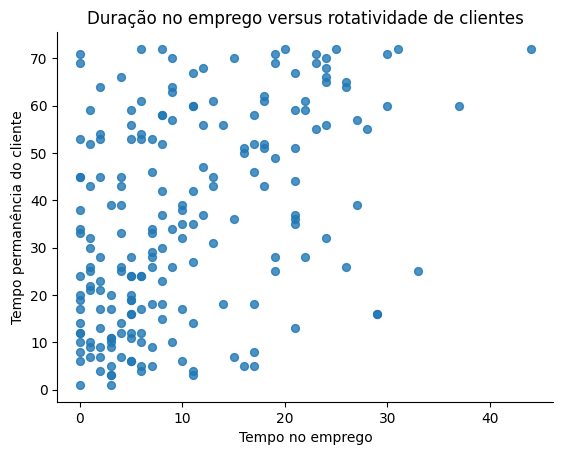

In [123]:
# @title Duração no emprego vs Permanência

churn_df.plot(kind='scatter', x='employ', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Tempo no emprego')
plt.ylabel('Tempo permanência do cliente')
plt.title('Duração no emprego versus rotatividade de clientes')
plt.show()

## **Etapa de pré-processamento de dados**

---

**Por que o pré-processamento é necessário?**

No aprendizado de máquina, a etapa de pré-processamento de dados é fundamental para garantir a qualidade e a eficácia dos modelos desenvolvidos. Uma das práticas essenciais nesse processo é a **padronização dos dados**, que envolve transformar as variáveis para que tenham média zero e desvio padrão igual a um.
Além da padronização, existem outras técnicas como a **normalização**, **codificação de variáveis categóricas** e o **tratamento de valores faltantes**.

1. **Melhorar a performance do modelo**: Algoritmos de aprendizado de máquina são sensíveis à escala das features. Quando as features têm escalas diferentes, aquelas com valores maiores podem dominar o processo de treinamento, levando a um modelo enviesado e com performance inferior. A padronização coloca todas as features na mesma escala, evitando problemas numéricos e permitindo que o algoritmo aprenda de forma mais eficaz.

2. **Convergência mais rápida e estável em algoritmos de otimização**:  Em algoritmos que usam gradiente descendente (como regressão logística, redes neurais, etc.), sensíveis à escala das variáveis, a padronização ajuda a acelerar o processo de convergência, permitindo que o gradiente descendente convirja mais rapidamente quando as features estão na mesma escala. Quando as variáveis não são padronizadas, o processo de otimização pode se tornar ineficiente, resultando em uma convergência mais lenta ou até mesmo na incapacidade de encontrar o mínimo global da função de custo.

3. **Facilita a interpretação dos coeficientes**:  Em modelos lineares como a regressão logística, os coeficientes representam a importância de cada variável dependente (*feature*). Quando as features são padronizadas, os coeficientes se tornam comparáveis, facilitando a interpretação sobre a importância relativa de cada feature.

4. **Uniformização das Escalas das Variáveis**: Em conjuntos de dados, é comum que as variáveis apresentem diferentes escalas e unidades de medida. Por exemplo, enquanto a renda pode ser expressa em milhares de reais, a idade é medida em anos. Modelos de aprendizado de máquina que utilizam medidas de distância, como k-Nearest Neighbors (k-NN) ou algoritmos baseados em gradiente, podem atribuir maior importância a variáveis com maior magnitude, independentemente de sua relevância real. A padronização coloca todas as variáveis na mesma escala, evitando vieses indesejados.

  * **Redução da Influência de Outliers**: Embora a padronização não elimine outliers, ela pode reduzir seu impacto relativo. Ao centralizar os dados em torno de uma média zero e normalizar a variância, os outliers se tornam menos proeminentes, permitindo que o modelo aprenda padrões mais representativos dos dados.

**Padronização dos Dados**

Conforme mencionado a padronização transforma os dados para que tenham média 0 e desvio padrão 1, de modo a preservar o padrão de distribuição original dos dados, centralizando e escalonando os valores. O cálculo é feito subtraindo-se a média e dividindo pelo desvio padrão de cada feature. A padronização é útil em algoritmos sensíveis à escala das features, como:

* Regressão logística
* Support Vector Machines (SVMs)
* K-Nearest Neighbors (KNN)
* Redes neurais
* Principal Component Analysis (PCA)

**Outras técnicas de pré-processamento:**

* **Normalização**: Escala os dados para um intervalo específico, como [0, 1].
* **Codificação de variáveis categóricas**: Converte variáveis categóricas em numéricas para que possam ser usadas pelos algoritmos.
* **Tratamento de valores faltantes**: Preenche ou remove valores faltantes nos dados.




---


Aplicar as técnicas de pré-processamento de dados é essencial para estabilidade, eficiência e interpretabilidade dos modelos de aprendizado de máquina. Negligenciá-la pode resultar em modelos tendenciosos, com desempenho inferior e interpretações equivocadas.


In [62]:
# Convertendo as features (variáveis independentes) em um array NumPy
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

# Exibindo as primeiras 5 linhas das features
print("Variáveis independentes (X):\n", X[0:5])

Variáveis independentes (X):
 [[ 11.  33.   7. 136. 136. 136. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.  33.  33.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.  30.  30.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.  76.  76.  76.   2.  10.   1.]
 [  7.  35.  14.  80.  80.  80.  80.   2.  15.   0.]]


In [63]:
# Convertendo os rótulos (variável dependente) em um array NumPy
y = np.asarray(churn_df['churn'])

# Exibindo os primeiros 5 rótulos
print("\nRótulos (y):\n", y[0:5])


Rótulos (y):
 [1. 1. 0. 0. 0.]


In [64]:
from sklearn import preprocessing
# Padronizando as features (transformando para média 0 e desvio padrão 1)
X = preprocessing.StandardScaler().fit(X).transform(X)

# Exibindo as primeiras 5 linhas das features após a padronização
print("\nFeatures padronizadas (X):\n", X[0:5])


Features padronizadas (X):
 [[-1.13518441 -0.62595491 -0.4588971   0.4751423   0.4751423   0.4751423
   0.4751423   1.6961288  -0.58477841 -0.85972695]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.32886061 -0.32886061
  -0.32886061 -0.6433592  -1.14437497 -0.85972695]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -0.35227817 -0.35227817
  -0.35227817 -1.42318853 -0.92053635 -0.85972695]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109  0.00679109  0.00679109
   0.00679109 -0.6433592  -0.02518185  1.16316   ]
 [-1.32048283 -0.47262854  0.23191574  0.03801451  0.03801451  0.03801451
   0.03801451 -0.6433592   0.53441472 -0.85972695]]


## **Divisão dos dados em conjuntos de treinamento e teste**


In [71]:
# Importando a função train_test_split do Scikit-learn
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
# 80% para treinamento e 20% para teste, com random_state=4 para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Exibindo o tamanho do conjunto de treinamento
print('Conjunto de Treinamento:', X_train.shape, y_train.shape)

# Exibindo o tamanho do conjunto de teste
print('Conjunto de Teste:', X_test.shape, y_test.shape)

Conjunto de Treinamento: (160, 10) (160,)
Conjunto de Teste: (40, 10) (40,)


## **Modelando uma Regressão Logística com Scikit-learn**

---
Para construir o modelo, começamos implementando a função `LogisticRegression` do pacote Scikit-learn, que possui diferentes otimizadores numéricos para encontrar parâmetros, tais como: `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, `'saga'`.

A versão da Regressão Logística no Scikit-learn suporta regularização, esta é uma técnica usada para resolver o problema de *overfitting* em modelos de aprendizado de máquina. O parâmetro C indica o inverso da força de regularização, que deve ser um float positivo. Valores menores especificam uma regularização mais forte. Em seuida, ajusta-se o modelo com o conjunto de treinamento.

* `LogisticRegression(C=0.01, solver='liblinear')`: Cria o objeto `LogisticRegression` com os seguintes parâmetros:

  * `C=0.01`: Parâmetro de regularização, que ajuda a prevenir o *overfitting*, valores menores especificam uma regularização mais forte.

  * `solver='liblinear'`: Especifica o parâmetro de otimização `'liblinear'`, boa opção para conjuntos de dados pequenos e médios.

* `.fit(X_train,y_train)`: Treina o modelo de regressão logística usando os dados de treinamento `X_train` (*features*) e `y_train` (rótulos).

In [105]:
# Importa a classe LogisticRegression da biblioteca Scikit-learn
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR # Exibe o modelo de regressão logística treinado e mostra os parâmetros escolhidos

LogisticRegression(C=0.01, solver='liblinear')

### **Visão geral dos otimizadores**
Cada otimizador tem suas características, vantagens e desvantagens, tornando a escolha do otimizador um passo importante no processo de modelagem.

1. `newton-cg`: **Método de Newton com Conjugate Gradient**:
  * Adequado para problemas de pequena a média escala com features densas.
  Requer o cálculo da Hessiana (matriz de derivadas segundas), o que pode ser computacionalmente caro para conjuntos de dados grandes.

2. `lbfgs`: **Limited-memory Broyden–Fletcher–Goldfarb–Shanno**:
  * Método Quasi-Newton que aproxima a Hessiana. É eficiente em termos de memória, tornando-o adequado para problemas de grande escala, mas pode ser mais lento que `'newton-cg'` em alguns casos.

3. `liblinear`: **Utiliza a biblioteca LIBLINEAR**:
  * Adequado para problemas de grande escala com features esparsas.
  Suporta apenas regularização L1 e L2. Pode ser mais rápido que `'newton-cg'` e `'lbfgs'` para dados esparsos.

4. `sag`: **Stochastic Average Gradient descent**:
  * Método de gradiente descendente estocástico que usa uma média dos gradientes.
  Adequado para problemas de grande escala com features densas. Converge mais rápido que o gradiente descendente estocástico padrão.

5. `saga`: **Variante do 'sag' que suporta regularização L1**:
  * Combina as vantagens do 'sag' com a capacidade de lidar com regularização L1.

In [77]:
# Usa o modelo de regressão logística treinado LR para fazer previsões nos dados de teste X_test
yhat = LR.predict(X_test)
yhat # Armazena as previsões geradas pelo modelo
# Exibindo as previsões
print("Previsões (yhat):", yhat)

Previsões (yhat): [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]


* `yhat` é um array contendo as classes previstas (0 ou 1) para cada amostra no conjunto de teste.


---

* `predizer_proba` retorna estimativas para todas as classes, ordenadas pelo rótulo das classes. Portanto, a primeira coluna é a probabilidade da `classe 0`, P(Y=0|X), e a segunda coluna é a probabilidade da `classe `1, P(Y=1|X):

In [79]:
# Calculando a probabilidade de cada classe para as amostras no conjunto de teste
yhat_prob = LR.predict_proba(X_test)
yhat_prob # Probabilidades calculadas para cada classe

# Exibindo as probabilidades
print("Probabilidades (yhat_prob):\n", yhat_prob)

Probabilidades (yhat_prob):
 [[0.54341504 0.45658496]
 [0.60605901 0.39394099]
 [0.56109377 0.43890623]
 [0.63583688 0.36416312]
 [0.56326336 0.43673664]
 [0.55319206 0.44680794]
 [0.52196501 0.47803499]
 [0.60373312 0.39626688]
 [0.40928918 0.59071082]
 [0.63207988 0.36792012]
 [0.58212024 0.41787976]
 [0.63211043 0.36788957]
 [0.47461064 0.52538936]
 [0.42455698 0.57544302]
 [0.66046238 0.33953762]
 [0.55002811 0.44997189]
 [0.5164954  0.4835046 ]
 [0.48473034 0.51526966]
 [0.48904711 0.51095289]
 [0.52204537 0.47795463]
 [0.61497219 0.38502781]
 [0.52493835 0.47506165]
 [0.63867398 0.36132602]
 [0.52093508 0.47906492]
 [0.50741434 0.49258566]
 [0.70476794 0.29523206]
 [0.56065001 0.43934999]
 [0.52132975 0.47867025]
 [0.51523421 0.48476579]
 [0.72077758 0.27922242]
 [0.67591405 0.32408595]
 [0.50978046 0.49021954]
 [0.42362683 0.57637317]
 [0.71698663 0.28301337]
 [0.59714599 0.40285401]
 [0.63607667 0.36392333]
 [0.4029295  0.5970705 ]
 [0.52120939 0.47879061]
 [0.65884179 0.341158

## **Avaliação do Modelo**

### **Índice Jaccard**

O índice Jaccard pode ser utilizado para a avaliação da precisão do modelo. Podemos definir Jaccard como o tamanho da intersecção dividido pelo tamanho da união dos dois conjuntos de rótulos. Se o conjunto inteiro de rótulos previstos para uma amostra corresponder estritamente ao conjunto verdadeiro de rótulos, então a precisão do subconjunto é 1.0; caso contrário, é 0.0.

In [118]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

**Análise do Resultado:**

De acordo com o índice Jaccard para a `classe 1` (*churn*) é 0,7059 ou 70,59%, o que indica uma boa interseção entre as previsões corretas e os casos reais positivos. No entanto, ainda há uma margem para melhorar a identificação de clientes propensos ao cancelamento (*churn*).

### **Log Loss (perda logarítmica)**

A `log_loss` é uma métrica que penaliza fortemente os modelos que fazem previsões com alta confiança, mas que estão erradas. É frequentemente aplicado na avaliação de modelos de classificação em problemas diversos, como previsão de cancelamento (*churn*), detecção de fraudes, diagnóstico médico etc, quando a probabilidade da previsão é crucial.

**Observações**:
* Quanto menor a Log Loss, melhor é o desempenho do modelo (valores próximos de zero são ideais).
* Ao calcular a Log Loss, é fundamental usar as probabilidades previstas pelo modelo e não as classes previstas.
* É importante usar a Log Loss em conjunto com outras métricas de avaliação, como acurácia, precisão, recall e F1-score, para obter uma visão completa do desempenho do modelo.

In [120]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.60083907009908

**Análise do Resultado:**

A métrica Log Loss de 0,6008 ou 60,08% sugere que o modelo tem um desempenho entre bom a razoável, havendo espaço para melhorias pois as previsões probabilísticas não estão perfeitamente calibradas. Quanto menor o Log Loss, mais confiáveis são as probabilidades atribuídas pelo modelo.

### **Análise das métricas de avaliação (*precision*, *recall*, F1-score, *support* e *accuracy*)**

In [122]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



**Análise dos resultados**:

1. **Precision**: foram classificadas corretamente, respectivamente, 73% e 86%, das amostras classificadas como da `classe 0` e como da `classe 1`, sendo portanto melhor em identificar corretamente as amostras da classe 1, quando as prevê.

2. **Recall**: foram classificadas corretamente, respectivamente, 96% e 40%, das amostras classificadas como da `classe 0` e como da `classe 1`. O `recall` para a classe 1 é baixo (40%), o modelo pode estar perdendo muitas amostras da `classe 1`.

3. **F1-score**: apresenta média harmônica entre precisão e recall,respectivamente, de 83% para a `classe 0` e 55% para a `classe 1`, refletindo o bom recall e a precisão razoável para a `classe 0`.

4. **Support**: respectivamente, 25 e 15, amostras pertencem à `classe 0` e a `classe 1` no conjunto de teste.

5. **Accuracy**: 75% de todas as amostras foram classificadas, indicando um desempenho razoável.

  * `macro avg`: média não ponderada das métricas para cada classe.
  * `weighted avg`: média ponderada das métricas para cada classe, considerando o número de amostras em cada classe.


### **Conclusões**

* A `classe 0` (não churn) possui alta precisão (96%) e um bom F1-score (83%), indicando que o modelo é mais eficaz em identificar clientes que não irão cancelar.
* O baixo número de falsos positivos (1) sugere que o modelo raramente prevê `churn` (cancelamento) incorretamente para clientes que permaneceriam.
* A `classe 1` (churn) apresenta um recall baixo (40%), indicando que o modelo não está conseguindo identificar adequadamente todos os clientes que cancelarão (9 falsos negativos).
* O F1-score da `classe 1` (55%) reflete o desequilíbrio entre precisão e recall, sugerindo que o modelo tem dificuldade em lidar com a classe minoritária.

### **Análise da Matriz de Confusão**

A matriz de confusão fornece uma visão detalhada dos erros de classificação do modelo, o que pode ajudar a identificar áreas onde o modelo pode ser melhorado.

**Dica**: com base na matriz de confusão é possível calcular as métricas acima para a `Classe 1` (`churn`).

* `Precision`: VP / (VP + FP) = 6 / (6 + 9) = 0,4 ou 40%
* `Recall`: VP / (VP + FN) = 6 / (6 + 1) = 0,86 ou 86%
* `F1-score`: 2 * (Precisão * Recall) / (Precisão + Recall) = 2 * (0,4 * 0,86) / (0,4 + 0,86) = 0,55 ou 55%
* `Accuracy`: (VP + VN) / Total = (6 + 24) / 40 = 0,75 ou 75%

Matriz de Confusão sem Normalização
[[ 6  9]
 [ 1 24]]


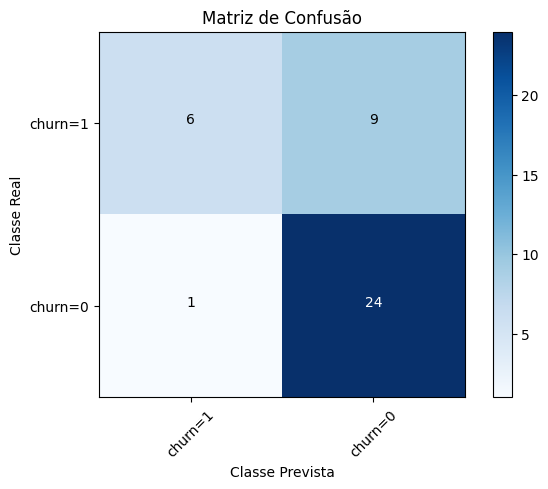

In [115]:
# Importa as funções 'classification_report' e 'confusion_matrix' do módulo metrics do Scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
# Importa o módulo 'itertools' para criar iteradores eficientes
import itertools

# Matriz de confusão calculada
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    Esta função gera a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem Normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Prevista')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plota a matriz de confusão não-normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de Confusão')

**Análise dos elementos da matriz**:

1. **Verdadeiros Positivos** (VP): 6 casos em que o modelo previu corretamente a classe positiva ("churn=1"), ou seja, clientes que realmente iriam cancelar o serviço e foram identificados corretamente pelo modelo.

2. **Falsos Positivos** (FP): 9 casos em que o modelo previu a classe positiva ("churn=1") incorretamente, ou seja, clientes que não iriam cancelar o serviço, mas foram classificados pelo modelo como se fossem.

3. **Verdadeiros Negativos** (VN): 24 casos em que o modelo previu corretamente a classe negativa ("churn=0"), ou seja, clientes que realmente não iriam cancelar o serviço e foram identificados corretamente.
4. **Falsos Negativos** (FN): 1 caso em que o modelo previu a classe negativa ("churn=0") incorretamente, ou seja, clientes que iriam cancelar o serviço, mas foram classificados pelo modelo como se não fossem.

### **Conclusões**

* O modelo apresenta melhor desempenho na identificação de clientes que **não irão cancelar o serviço** (`VN = 24`) do que naqueles que irão cancelar (`VP = 6`), ou seja, não é capaz de auxiliar numa estratégia de marketing voltada a reter clientes.

* O número de falsos positivos (`FP = 9`) é relativamente alto, o que indica que o modelo está classificando erroneamente alguns clientes como propensos a cancelar o serviço quando na verdade não irão. No mundo real, o modelo poderia sugerir o aumento de custos (desnecessários) com ações de retenção para esses clientes.

* O número de falsos negativos (`FN = 1`) é baixo, o que é positivo, pois indica que o modelo está perdendo poucos clientes que realmente irão cancelar. No entanto, dependendo do contexto, mesmo um falso negativo pode ser problemático.


### **Análise Gráfica do Modelo Regressão Logística**: Fronteira de Decisão e da Curva ROC (*Receiver Operating Characteristic*)



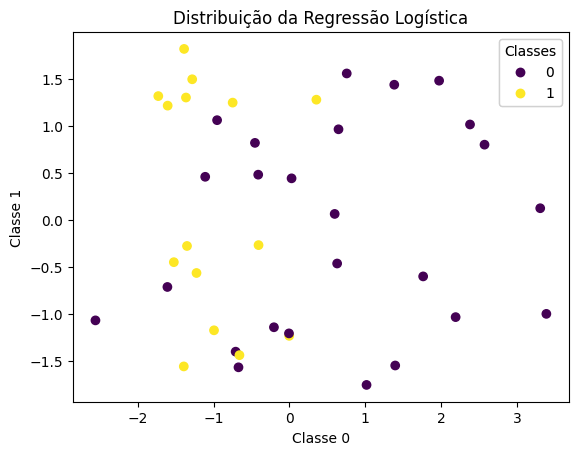

In [142]:
from sklearn.decomposition import PCA

# Reduzindo o modelo de regressão logística para duas dimensões usando PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plotar os pontos de dados
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')

# Incluir legenda de cores
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
plt.gca().add_artist(legend1)

plt.xlabel('Classe 0')
plt.ylabel('Classe 1')
plt.title('Distribuição da Regressão Logística')
plt.show()

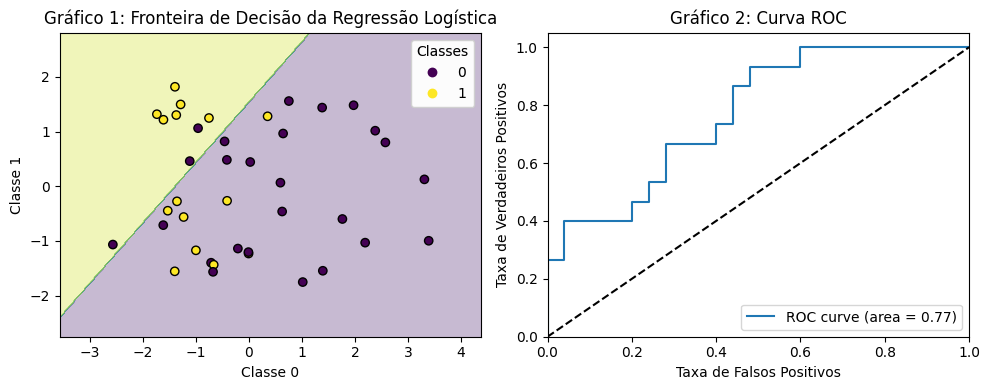

In [145]:
from sklearn.metrics import roc_curve, auc

#model = LR.fit(X_train, y_train)

# Reduzindo para duas dimensões usando PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Criar a figura e os eixos para os dois gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotando a fronteira de decisão no primeiro subplot (ax1)
def plot_decision_boundary(clf, X, y, ax, pca):
    # Gerar uma grade de pontos no espaço 2D
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Transformar a grade de volta para o espaço original
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid)

    # Obter as previsões para cada ponto na grade
    Z = clf.predict(grid_original)
    Z = Z.reshape(xx.shape)

    # Plotar o contorno da fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plotar a fronteira de decisão no primeiro subplot (ax1)
plot_decision_boundary(model, X_test_pca, y_test, ax1, pca)

# Plotar os pontos de dados no primeiro subplot (ax1)
scatter = ax1.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k')

# Adicionar rótulos e título ao primeiro subplot (ax1)
ax1.set_xlabel('Classe 0')
ax1.set_ylabel('Classe 1')
ax1.set_title('Gráfico 1: Fronteira de Decisão da Regressão Logística')

# Adicionar legenda ao primeiro subplot (ax1)
legend = ax1.legend(*scatter.legend_elements(), title="Classes")
ax1.add_artist(legend)

# Plotando a curva ROC no segundo subplot (ax2)
yhat_prob = LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, yhat_prob[:, 1])
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taxa de Falsos Positivos')
ax2.set_ylabel('Taxa de Verdadeiros Positivos')
ax2.set_title('Gráfico 2: Curva ROC')
ax2.legend(loc="lower right")

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

**Análise gráfica**:

1. **Fronteira de Decisão** (linha verde): representa o limite que o modelo usa para classificar os clientes como "churn=1" (cor amarela) ou "churn=0" (cor roxa).A posição da fronteira de decisão é influenciada pelos dados de treinamento e pelos parâmetros do modelo. Idealmente, a fronteira de decisão deveria separar perfeitamente os pontos das duas classes. No entanto, pode-se observar alguns pontos amarelos do lado roxo da linha e vice-versa, o que indica que o modelo cometeu alguns erros de classificação.

2. **Curva ROC**: a curva ROC permite visualizar o *trade-off* entre sensibilidade (taxa de verdadeiros positivos) e especificidade (1 - taxa de falsos positivos) do modelo em diferentes limiares de decisão. Quanto mais a curva ROC se aproximar do canto superior esquerdo do gráfico, melhor será o desempenho do modelo, pois ele terá uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos.

  * **Área sob a curva (AUC)**: é uma métrica que quantifica o desempenho geral do modelo, a AUC é de 0.77 o que indica um desempenho bom a razoável. Uma AUC de 0.5 representa um modelo aleatório, enquanto uma AUC de 1.0 representa um modelo perfeito.


## **Ajustes ao modelo de Regressão Logística (LR)**

Experimentação de diferentes hiperparâmetros, como a escolha do otimizador (`'solver'`) e parâmetro de regularização (C), buscando variações que apresentem melhor desempenho, especialmente na redução de falsos positivos.

In [133]:
# Modelando 'LR1' com hiperparâmetros diferentes
LR1 = LogisticRegression(C=0.1, solver='newton-cg').fit(X_train,y_train)
yhat2 = LR1.predict(X_test)
yhat_prob2 = LR1.predict_proba(X_test)
print ("[LR1] Jaccard-Score: %.6f" %jaccard_score(y_test, yhat,pos_label=0))
print ("[LR1] LogLoss: %.6f" % log_loss(y_test, yhat_prob2))
print ("[LR1] Relatório de Classificação:")
print (classification_report(y_test, yhat))

[LR1] Jaccard-Score: 0.705882
[LR1] LogLoss: 0.591510
[LR1] Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [136]:
# Modelando 'LR2' com hiperparâmetros diferentes
LR2 = LogisticRegression(C=0.1, solver='saga').fit(X_train,y_train)
yhat2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)
print ("[LR2] Jaccard-Score: %.6f" %jaccard_score(y_test, yhat,pos_label=0))
print ("[LR2] LogLoss: %.6f" % log_loss(y_test, yhat_prob2))
print ("[LR2] Relatório de Classificação:")
print (classification_report(y_test, yhat))

[LR2] Jaccard-Score: 0.705882
[LR2] LogLoss: 0.591240
[LR2] Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83        25
         1.0       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# **Referências**

1. JAIN, Hemlata; KHUNTETA, Ajay; SRIVASTAVA, Sumit. **Churn prediction in telecommunication using logistic regression and logit boost**. Procedia Computer Science, v. 167, p. 101-112, 2020. Disponível em: https://www.sciencedirect.com/science/article/pii/S1877050920306529?via%3Dihub Acesso em: 11/10/2024.

2. DIAS, Camila Alves. Previsão de Churn A3Data Telecomunicações.  https://github.com/cmdiasbr/Desafio-Telecom